<a href="https://colab.research.google.com/github/cfernando89/Bootcamp_Data_Science/blob/main/Alura_BootCamp_Modulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Módulo 2

## Aula 1

In [320]:
#importação das bibliotecas a serem usadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [249]:
#Importação dos dados do módulo 1
ordenados_total = pd.read_csv('/content/drive/MyDrive/Alura/Mod_1_ordenados_total.csv').set_index('Unidade da Federação')
mes_mais_recente = ordenados_total.columns[-1]
ordenados_total = ordenados_total.T[6:].T/1000000
gastos_mes_mais_recente = ordenados_total[mes_mais_recente]


In [398]:

##importação dos dados brutos de gastos do SUS
file_path = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'
dados_raw = pd.read_csv(file_path, encoding='latin1', sep=';',skiprows=3, skipfooter=12, thousands='.',  decimal=',')
dados_raw.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


In [252]:
file_populacao = 'https://github.com/alura-cursos/agendamento-hospitalar/blob/main/dados/estimativa_dou_2020.xls?raw=true'
populacao_ibge_estimativa = pd.read_excel(file_populacao)
populacao_ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


In [253]:
dados_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

#Fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [254]:
from io import StringIO

dados_populacao_io = StringIO(dados_populacao)

populacao = pd.read_csv(dados_populacao_io, sep='\t')
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


### Desafio 1.1: ler os dados direto do wikipedia

In [255]:
table_wiki = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')

#Quantidade de tabelas encontradas
print(len(table_wiki))                        

5


In [256]:
#Como não temos um tílulo na tabela e a quantidade de tabelas na página é pequena, 
  #é possível selecionar a correta manualmente
populacao = table_wiki[0]
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


###-----

In [257]:
#transformar colunas para um modulo padronizado
populacao.columns

Index(['Posição', 'Unidade federativa', 'População', '% da pop. total',
       'País comparável (habitantes)'],
      dtype='object')

In [258]:
novas_colunas = {'Posição':'posicao', 'Unidade federativa':'UF', 'População':'populacao', '% da pop. total':'%_pop_total',
       'País comparável':'pais_comparavel'}
populacao.rename(columns=novas_colunas, inplace=True)
populacao.head()

,posicao,UF,populacao,%_pop_total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [259]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   posicao                       27 non-null     int64 
 1   UF                            27 non-null     object
 2   populacao                     27 non-null     object
 3   %_pop_total                   27 non-null     object
 4   País comparável (habitantes)  27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [260]:
#alterando os tipos de cada coluna
populacao['populacao'] = populacao['populacao'].str.replace(" ","").astype('int')

In [261]:
populacao['%_pop_total'] = populacao['%_pop_total'].str.replace("%","").str.replace(",",".").astype('float')
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   posicao                       27 non-null     int64  
 1   UF                            27 non-null     object 
 2   populacao                     27 non-null     int64  
 3   %_pop_total                   27 non-null     float64
 4   País comparável (habitantes)  27 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ KB


In [262]:
populacao = populacao[['UF','populacao','%_pop_total']]
populacao.head()

,UF,populacao,%_pop_total
0,São Paulo,46289333,21.9
1,Minas Gerais,21292666,10.1
2,Rio de Janeiro,17366189,8.2
3,Bahia,14930634,7.1
4,Paraná,11516840,5.4


In [263]:
populacao = populacao.set_index('UF')

In [264]:
display(populacao.head())
display(gastos_mes_mais_recente.head())

,populacao,%_pop_total
UF,,
São Paulo,46289333,21.9
Minas Gerais,21292666,10.1
Rio de Janeiro,17366189,8.2
Bahia,14930634,7.1
Paraná,11516840,5.4


Unidade da Federação
São Paulo            282.709570
Minas Gerais         120.467187
Paraná                80.320853
Rio Grande do Sul     78.929704
Rio de Janeiro        71.540227
Name: 2020/Jul, dtype: float64

In [265]:
gastos_mes_mais_recente.head()

Unidade da Federação
São Paulo            282.709570
Minas Gerais         120.467187
Paraná                80.320853
Rio Grande do Sul     78.929704
Rio de Janeiro        71.540227
Name: 2020/Jul, dtype: float64

In [266]:
#Retirar espaços antes e depois do índice, caso tenha
populacao.index = populacao.index.str.strip()



In [267]:
gastos_mes_mais_recente.index

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo', 'Rio Grande do Norte',
       'Paraíba', 'Distrito Federal', 'Mato Grosso do Sul', 'Piauí', 'Alagoas',
       'Mato Grosso', 'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre',
       'Roraima', 'Amapá'],
      dtype='object', name='Unidade da Federação')

In [268]:
#Limpar casos com nome do estado duplicados

for estado in gastos_mes_mais_recente.index:
  print(f"{estado} {estado} => {estado}")
  #populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)
populacao.index

São Paulo São Paulo => São Paulo
Minas Gerais Minas Gerais => Minas Gerais
Paraná Paraná => Paraná
Rio Grande do Sul Rio Grande do Sul => Rio Grande do Sul
Rio de Janeiro Rio de Janeiro => Rio de Janeiro
Bahia Bahia => Bahia
Pernambuco Pernambuco => Pernambuco
Santa Catarina Santa Catarina => Santa Catarina
Ceará Ceará => Ceará
Goiás Goiás => Goiás
Pará Pará => Pará
Maranhão Maranhão => Maranhão
Espírito Santo Espírito Santo => Espírito Santo
Rio Grande do Norte Rio Grande do Norte => Rio Grande do Norte
Paraíba Paraíba => Paraíba
Distrito Federal Distrito Federal => Distrito Federal
Mato Grosso do Sul Mato Grosso do Sul => Mato Grosso do Sul
Piauí Piauí => Piauí
Alagoas Alagoas => Alagoas
Mato Grosso Mato Grosso => Mato Grosso
Amazonas Amazonas => Amazonas
Sergipe Sergipe => Sergipe
Tocantins Tocantins => Tocantins
Rondônia Rondônia => Rondônia
Acre Acre => Acre
Roraima Roraima => Roraima
Amapá Amapá => Amapá


Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='UF')

In [269]:
gastos_e_populacao_recente = populacao.join(gastos_mes_mais_recente)
gastos_e_populacao_recente

,populacao,%_pop_total,2020/Jul
UF,,,
São Paulo,46289333,21.9,282.709570
Minas Gerais,21292666,10.1,120.467187
Rio de Janeiro,17366189,8.2,71.540227
Bahia,14930634,7.1,58.898100
Paraná,11516840,5.4,80.320853
Rio Grande do Sul,11422973,5.4,78.929704
Pernambuco,9616621,4.5,62.325444
Ceará,9187103,4.3,30.809221
Pará,8690745,4.1,27.618728


### Desafio 1.2: Estruturar uma função para limpar os dados, retornando a tabela "populacao" e a tabela unida

In [270]:
def CleasingPopulation(tabela,tabela_de_index):
  tabela.rename(columns={'Posição':'posicao', 'Unidade federativa':'UF', 'População':'populacao', '% da pop. total':'%_pop_total',
       'País comparável':'pais_comparavel'}, inplace=True)
  #alterando os tipos de cada coluna
  tabela['populacao'] = tabela['populacao'].str.replace(" ","").astype('int')
  tabela['%_pop_total'] = tabela['%_pop_total'].str.replace("%","").str.replace(",",".").astype('float')
  
  #selecionar apenas as colunas de interesse, mudando o index para UF
  tabela = tabela[['UF','populacao']].set_index('UF')
  
  #Retirar espaços antes e depois do índice, caso tenha
  tabela.index = tabela.index.str.strip()

  #Limpar casos com nome do estado duplicados


  for estado in tabela_de_index.index:
    tabela.index = tabela.index.str.replace(f'{estado} {estado}', estado)


  return tabela.join(tabela_de_index)



In [271]:
gastos_mes_mais_recente


Unidade da Federação
São Paulo              282.709570
Minas Gerais           120.467187
Paraná                  80.320853
Rio Grande do Sul       78.929704
Rio de Janeiro          71.540227
Bahia                   58.898100
Pernambuco              62.325444
Santa Catarina          51.764535
Ceará                   30.809221
Goiás                   33.499284
Pará                    27.618728
Maranhão                24.374205
Espírito Santo          27.460475
Rio Grande do Norte     19.593057
Paraíba                 15.491469
Distrito Federal        22.233542
Mato Grosso do Sul      12.508717
Piauí                   18.019214
Alagoas                 13.087850
Mato Grosso             13.083152
Amazonas                13.358514
Sergipe                  3.312766
Tocantins                4.489666
Rondônia                 7.407388
Acre                     1.163813
Roraima                  2.739498
Amapá                    2.155083
Name: 2020/Jul, dtype: float64

In [272]:
dados_populacao_io = StringIO(dados_populacao)
populacao = pd.read_csv(dados_populacao_io, sep='\t')

CleasingPopulation(populacao,gastos_mes_mais_recente)

,populacao,2020/Jul
UF,,
São Paulo,46289333,282.709570
Minas Gerais,21292666,120.467187
Rio de Janeiro,17366189,71.540227
Bahia,14930634,58.898100
Paraná,11516840,80.320853
Rio Grande do Sul,11422973,78.929704
Pernambuco,9616621,62.325444
Ceará,9187103,30.809221
Pará,8690745,27.618728


### ----

##Aula 2

In [273]:
gastos_e_populacao_recente = gastos_e_populacao_recente.drop('%_pop_total',axis=1)

In [274]:
gastos_e_populacao_recente.head(10)

,populacao,2020/Jul
UF,,
São Paulo,46289333,282.709570
Minas Gerais,21292666,120.467187
Rio de Janeiro,17366189,71.540227
Bahia,14930634,58.898100
Paraná,11516840,80.320853
Rio Grande do Sul,11422973,78.929704
Pernambuco,9616621,62.325444
Ceará,9187103,30.809221
Pará,8690745,27.618728


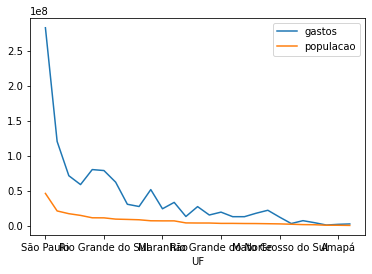

In [275]:
#horripilante (dados de unidades diferentes no mesmo eixo)
gastos_e_populacao_recente['gastos'] = gastos_e_populacao_recente['2020/Jul']*1000000
gastos_e_populacao_recente[['gastos','populacao']].plot()

In [276]:
#Com o gráfico do jeito que está, parece uma diferença muito maior do que é realmente
gastos_e_populacao_recente.loc[['Rio Grande do Sul', 'São Paulo']]

,populacao,2020/Jul,gastos
UF,,,
Rio Grande do Sul,11422973,78.929704,7.892970e+07
São Paulo,46289333,282.709570,2.827096e+08


In [277]:
gastos_e_populacao_recente['gasto_por_habitante'] = gastos_e_populacao_recente['gastos']/gastos_e_populacao_recente['populacao']
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos,gasto_por_habitante
UF,,,,
São Paulo,46289333,282.709570,2.827096e+08,6.107445
Minas Gerais,21292666,120.467187,1.204672e+08,5.657685
Rio de Janeiro,17366189,71.540227,7.154023e+07,4.119512
Bahia,14930634,58.898100,5.889810e+07,3.944782
Paraná,11516840,80.320853,8.032085e+07,6.974209


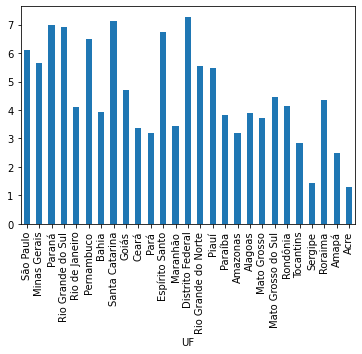

In [278]:
#Ordenado por estado que gasta mais em valor absoluto
gastos_e_populacao_recente.sort_values('gastos',
    ascending=False)['gasto_por_habitante'].plot(kind='bar')

### Desafio 2.1: Ordenar por gasto por habitante; Ordenar por habitantes

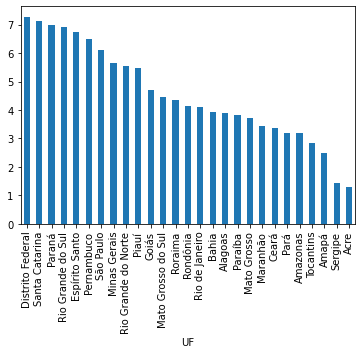

In [279]:
#Ordenado por estado com maior gasto por habitante
gastos_e_populacao_recente['gasto_por_habitante'].sort_values(
    ascending=False).plot(kind='bar')

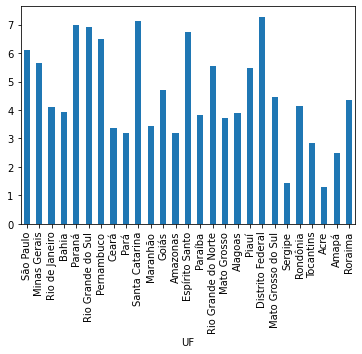

In [280]:
#Ordenado por estado com maior população
gastos_e_populacao_recente.sort_values('populacao',
    ascending=False)['gasto_por_habitante'].plot(kind='bar')

In [281]:
gastos_e_populacao_recente.sort_values('populacao',
    ascending=False)

,populacao,2020/Jul,gastos,gasto_por_habitante
UF,,,,
São Paulo,46289333,282.709570,2.827096e+08,6.107445
Minas Gerais,21292666,120.467187,1.204672e+08,5.657685
Rio de Janeiro,17366189,71.540227,7.154023e+07,4.119512
Bahia,14930634,58.898100,5.889810e+07,3.944782
Paraná,11516840,80.320853,8.032085e+07,6.974209
Rio Grande do Sul,11422973,78.929704,7.892970e+07,6.909734
Pernambuco,9616621,62.325444,6.232544e+07,6.481013
Ceará,9187103,30.809221,3.080922e+07,3.353530
Pará,8690745,27.618728,2.761873e+07,3.177947


##----

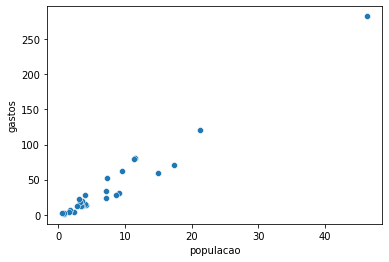

In [282]:
sns.scatterplot(data=gastos_e_populacao_recente/1000000, x='populacao', y='gastos')

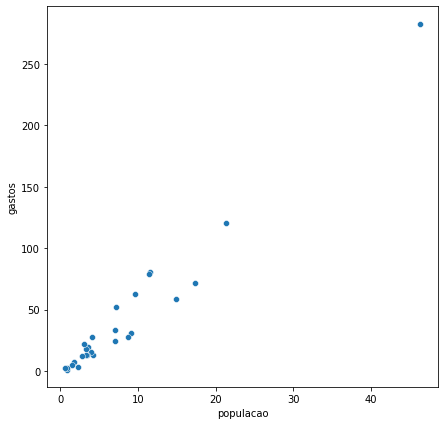

In [283]:
plt.figure(figsize = (7,7))
sns.scatterplot(data=gastos_e_populacao_recente/1000000, x='populacao', y='gastos')

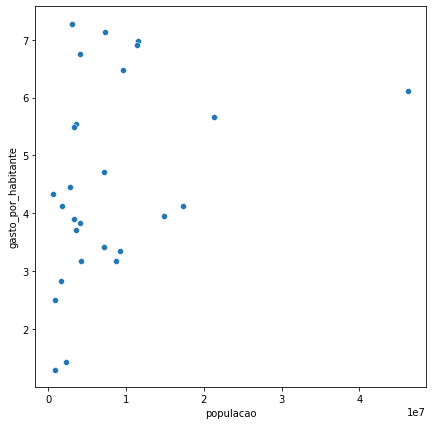

In [284]:
plt.figure(figsize = (7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gasto_por_habitante')

### Desafio 2.2: fazer os ultimos gráficos para o mês anterior

In [285]:
#Separando os gastos dos últimos ultimos 6 meses
semestre_mais_recente = ordenados_total.columns[-2:]
semestre_mais_recente

Index(['2020/Jun', '2020/Jul'], dtype='object')

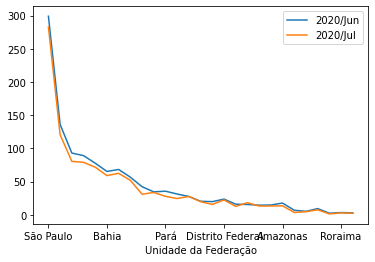

In [286]:
gastos_semestre_mais_recente = ordenados_total[semestre_mais_recente]
gastos_semestre_mais_recente.plot()

In [287]:
gastos_semestre_mais_recente

,2020/Jun,2020/Jul
Unidade da Federação,,
São Paulo,299.060852,282.709570
Minas Gerais,135.977572,120.467187
Paraná,92.901461,80.320853
Rio Grande do Sul,89.019479,78.929704
Rio de Janeiro,77.604925,71.540227
Bahia,65.159301,58.898100
Pernambuco,68.145111,62.325444
Santa Catarina,56.503748,51.764535
Ceará,42.146556,30.809221


In [288]:
#Rodando novamente a função para juntar gastos e população
dados_populacao_io = StringIO(dados_populacao)
populacao = pd.read_csv(dados_populacao_io, sep='\t')

gastos_e_populacao_semestre = CleasingPopulation(populacao,gastos_semestre_mais_recente)
gastos_e_populacao_semestre

,populacao,2020/Jun,2020/Jul
UF,,,
São Paulo,46289333,299.060852,282.709570
Minas Gerais,21292666,135.977572,120.467187
Rio de Janeiro,17366189,77.604925,71.540227
Bahia,14930634,65.159301,58.898100
Paraná,11516840,92.901461,80.320853
Rio Grande do Sul,11422973,89.019479,78.929704
Pernambuco,9616621,68.145111,62.325444
Ceará,9187103,42.146556,30.809221
Pará,8690745,35.396031,27.618728


In [289]:
for coluna in gastos_e_populacao_semestre.columns[1:]:
  gastos_e_populacao_semestre[f"gastos_" + coluna.replace(
      "/","_")] = gastos_e_populacao_semestre[coluna]*1000000
gastos_e_populacao_semestre

,populacao,2020/Jun,2020/Jul,gastos_2020_Jun,gastos_2020_Jul
UF,,,,,
São Paulo,46289333,299.060852,282.709570,2.990609e+08,2.827096e+08
Minas Gerais,21292666,135.977572,120.467187,1.359776e+08,1.204672e+08
Rio de Janeiro,17366189,77.604925,71.540227,7.760493e+07,7.154023e+07
Bahia,14930634,65.159301,58.898100,6.515930e+07,5.889810e+07
Paraná,11516840,92.901461,80.320853,9.290146e+07,8.032085e+07
Rio Grande do Sul,11422973,89.019479,78.929704,8.901948e+07,7.892970e+07
Pernambuco,9616621,68.145111,62.325444,6.814511e+07,6.232544e+07
Ceará,9187103,42.146556,30.809221,4.214656e+07,3.080922e+07
Pará,8690745,35.396031,27.618728,3.539603e+07,2.761873e+07


In [290]:
for coluna in gastos_e_populacao_semestre.columns[1:3]:
  gastos_e_populacao_semestre[f"valor_habit_" + coluna.replace(
      "/","_")] = gastos_e_populacao_semestre[coluna]*1000000/gastos_e_populacao_semestre['populacao']
gastos_e_populacao_semestre.head()
  #print(coluna)

,populacao,2020/Jun,2020/Jul,gastos_2020_Jun,gastos_2020_Jul,valor_habit_2020_Jun,valor_habit_2020_Jul
UF,,,,,,,
São Paulo,46289333,299.060852,282.709570,2.990609e+08,2.827096e+08,6.460686,6.107445
Minas Gerais,21292666,135.977572,120.467187,1.359776e+08,1.204672e+08,6.386122,5.657685
Rio de Janeiro,17366189,77.604925,71.540227,7.760493e+07,7.154023e+07,4.468737,4.119512
Bahia,14930634,65.159301,58.898100,6.515930e+07,5.889810e+07,4.364135,3.944782
Paraná,11516840,92.901461,80.320853,9.290146e+07,8.032085e+07,8.066576,6.974209


In [291]:
gastos_e_populacao_semestre.columns

Index(['populacao', '2020/Jun', '2020/Jul', 'gastos_2020_Jun',
       'gastos_2020_Jul', 'valor_habit_2020_Jun', 'valor_habit_2020_Jul'],
      dtype='object')

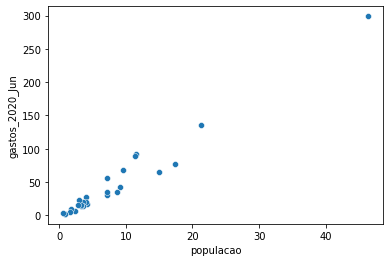

In [292]:
sns.scatterplot(data=gastos_e_populacao_semestre/1000000, x='populacao', y='gastos_2020_Jun')


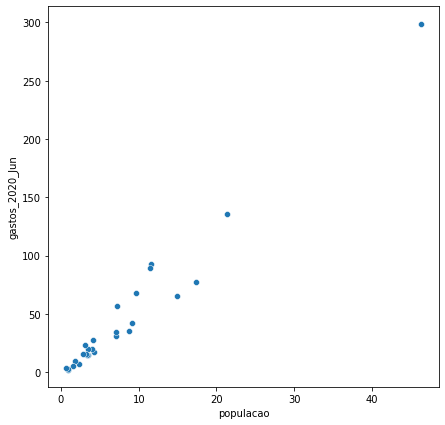

In [293]:
plt.figure(figsize = (7,7))
sns.scatterplot(data=gastos_e_populacao_semestre/1000000, x='populacao', y='gastos_2020_Jun')


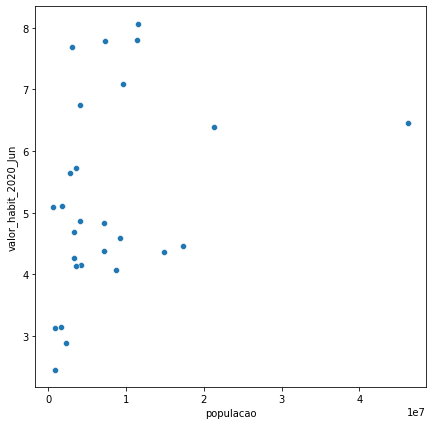

In [294]:
plt.figure(figsize = (7,7))
sns.scatterplot(data=gastos_e_populacao_semestre, x='populacao', y='valor_habit_2020_Jun')

Text(0.5, 1.0, 'R$ por habitante Junho')

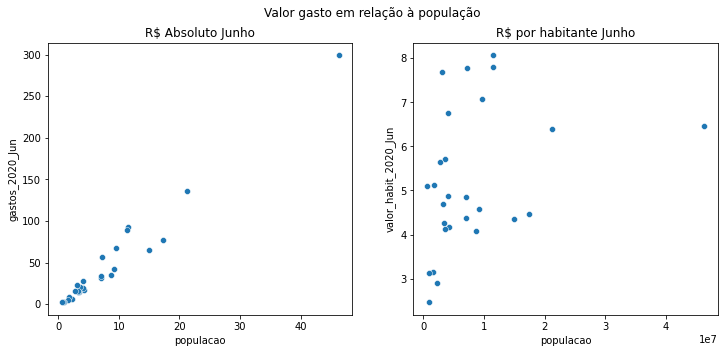

In [295]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))#, sharey=True)
fig.suptitle('Valor gasto em relação à população')

# 
sns.scatterplot(ax=axes[0], data=gastos_e_populacao_semestre/1000000, x='populacao', y='gastos_2020_Jun')
axes[0].set_title("R$ Absoluto Junho")

# 
sns.scatterplot(ax=axes[1],data=gastos_e_populacao_semestre, x='populacao', y='valor_habit_2020_Jun')
axes[1].set_title("R$ por habitante Junho")



### Desafio 2.3: Plotar no mesmo gráfico com os dois últimos meses juntos

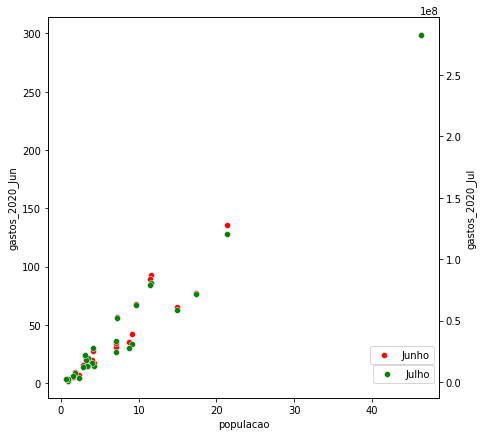

In [296]:
plt.figure(figsize = (7,7))
x_pop = gastos_e_populacao_semestre['populacao']/1000000

sns.scatterplot(data=gastos_e_populacao_semestre/1000000, x='populacao', 
                y='gastos_2020_Jun',color='r',label='Junho')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.15))

ax2 = plt.twinx()
sns.scatterplot(ax=ax2,data=gastos_e_populacao_semestre, x=x_pop,
                y='gastos_2020_Jul',color='g',label = 'Julho')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.1))


## ---

In [297]:
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos,gasto_por_habitante
UF,,,,
São Paulo,46289333,282.709570,2.827096e+08,6.107445
Minas Gerais,21292666,120.467187,1.204672e+08,5.657685
Rio de Janeiro,17366189,71.540227,7.154023e+07,4.119512
Bahia,14930634,58.898100,5.889810e+07,3.944782
Paraná,11516840,80.320853,8.032085e+07,6.974209


In [298]:
def insere_gastos_e_gasto_habitante(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str):
  gasto_do_mes = todos_os_gastos[mes]
  
  dados[f'gastos_{mes}'] = gasto_do_mes*1000000
  dados[f'gasto_por_habitante_{mes}'] = dados[f'gastos_{mes}'] / dados['populacao']

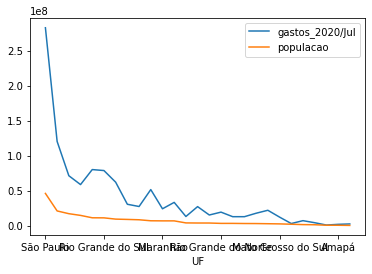

In [299]:

insere_gastos_e_gasto_habitante(ordenados_total, gastos_e_populacao_recente, "2020/Jul")
gastos_e_populacao_recente[['gastos_2020/Jul','populacao']].plot()

In [300]:
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos,gasto_por_habitante,gastos_2020/Jul,gasto_por_habitante_2020/Jul
UF,,,,,,
São Paulo,46289333,282.709570,2.827096e+08,6.107445,2.827096e+08,6.107445
Minas Gerais,21292666,120.467187,1.204672e+08,5.657685,1.204672e+08,5.657685
Rio de Janeiro,17366189,71.540227,7.154023e+07,4.119512,7.154023e+07,4.119512
Bahia,14930634,58.898100,5.889810e+07,3.944782,5.889810e+07,3.944782
Paraná,11516840,80.320853,8.032085e+07,6.974209,8.032085e+07,6.974209


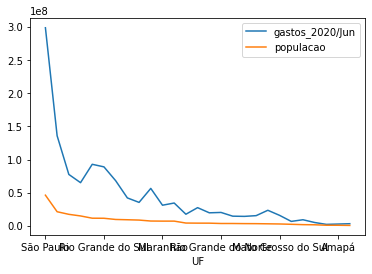

In [301]:

insere_gastos_e_gasto_habitante(ordenados_total, gastos_e_populacao_recente, "2020/Jun")
gastos_e_populacao_recente[['gastos_2020/Jun','populacao']].plot()

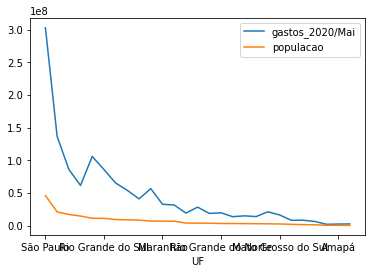

In [302]:
insere_gastos_e_gasto_habitante(ordenados_total, gastos_e_populacao_recente, "2020/Mai")
gastos_e_populacao_recente[['gastos_2020/Mai','populacao']].plot()

In [303]:
gastos_e_populacao_recente.head()


,populacao,2020/Jul,gastos,gasto_por_habitante,gastos_2020/Jul,gasto_por_habitante_2020/Jul,gastos_2020/Jun,gasto_por_habitante_2020/Jun,gastos_2020/Mai,gasto_por_habitante_2020/Mai
UF,,,,,,,,,,
São Paulo,46289333,282.709570,2.827096e+08,6.107445,2.827096e+08,6.107445,2.990609e+08,6.460686,3.028577e+08,6.542710
Minas Gerais,21292666,120.467187,1.204672e+08,5.657685,1.204672e+08,5.657685,1.359776e+08,6.386122,1.368673e+08,6.427907
Rio de Janeiro,17366189,71.540227,7.154023e+07,4.119512,7.154023e+07,4.119512,7.760493e+07,4.468737,8.628103e+07,4.968334
Bahia,14930634,58.898100,5.889810e+07,3.944782,5.889810e+07,3.944782,6.515930e+07,4.364135,6.175678e+07,4.136246
Paraná,11516840,80.320853,8.032085e+07,6.974209,8.032085e+07,6.974209,9.290146e+07,8.066576,1.061037e+08,9.212921


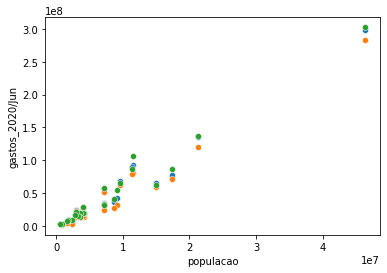

In [304]:
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gastos_2020/Jun')
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gastos_2020/Jul')
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gastos_2020/Mai')

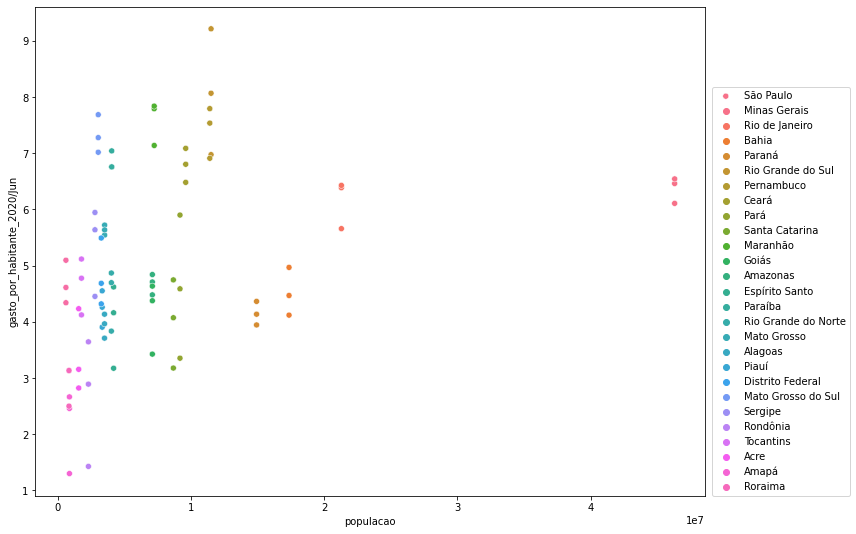

In [305]:
plt.figure(figsize=(12,9))
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gasto_por_habitante_2020/Jun',hue='UF')
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gasto_por_habitante_2020/Jul',hue='UF')
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gasto_por_habitante_2020/Mai',hue='UF')
plt.legend('')
plt.legend(gastos_e_populacao_recente.index, loc=(1.01,0))

### Desfio 2.4: Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese, e que esses dados podem ser alterados futuramente.

##Aula 3

In [306]:
ordenados_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172.834915,170.481850,170.278286,172.402181,175.416596,179.525002,179.898070,180.082204,191.685220,190.539739,177.086381,192.321557,178.596377,216.951592,215.053018,212.890248,212.670901,214.041237,215.212536,214.135444,216.056583,208.973892,192.127099,213.467886,195.784795,239.323932,221.172991,231.777549,223.933799,224.067914,248.010131,224.052980,238.935453,225.484059,210.611461,229.087003,221.598044,241.399915,229.821234,250.793570,...,263.471759,292.113405,274.301073,283.534617,300.593739,267.297244,287.114784,267.113249,259.451686,279.497571,254.004628,285.270560,286.191965,291.440947,278.926018,285.851920,295.419311,277.576166,301.454867,278.114302,266.239801,291.081407,267.662509,285.576313,292.584828,308.925598,281.405147,306.633988,302.367277,293.685713,303.382527,282.391773,272.697695,301.991168,271.356784,276.606289,251.696363,302.857661,299.060852,282.709570
Minas Gerais,70.301090,79.119006,79.046322,79.268070,79.608653,82.200224,80.374117,82.400147,88.613477,84.486996,88.928630,99.018156,83.675120,100.240652,91.831325,97.289703,95.723397,100.050009,98.968065,98.202119,96.962394,94.767639,92.412771,95.806556,90.764890,107.389850,100.829767,105.485568,99.666116,103.356996,107.844260,104.341138,100.525404,101.943625,99.538954,107.738916,103.140773,111.065996,106.094329,115.487199,...,136.715099,153.412120,144.291438,147.533497,156.055553,142.285104,148.306094,142.323945,138.341192,146.501618,130.702126,151.496245,150.687603,153.589259,150.251751,156.633990,160.420043,145.941008,157.247580,148.172784,145.387241,153.177305,142.669154,151.943631,157.922599,163.591462,154.114823,166.735650,161.707825,157.419732,166.133803,152.106660,152.398599,158.097904,141.323176,147.078556,126.330650,136.867276,135.977572,120.467187
Paraná,48.855046,55.611791,56.115136,55.574832,56.094755,59.802402,56.699001,58.091986,61.365941,59.667209,57.816198,60.381594,57.239102,69.070488,64.054678,68.685543,67.931227,70.958763,69.225784,67.849969,68.558209,67.158497,63.094274,66.902644,64.501134,77.138871,70.755397,73.456757,71.839021,73.013831,76.151007,74.240963,73.042387,76.364750,70.517638,74.712784,71.314740,76.914668,74.232937,81.709021,...,106.027688,120.535313,111.725261,118.590172,122.122836,110.656148,117.567692,112.457523,105.558123,116.133193,107.075982,122.331355,124.731345,127.073853,122.616924,127.991901,131.257163,120.647377,129.530164,121.810669,112.984631,124.159240,117.715473,123.907372,127.447034,132.576563,124.858292,134.621316,127.174095,126.172680,133.847978,126.209369,113.545319,122.268754,116.061603,114.476998,96.727112,106.103738,92.901461,80.320853
Rio Grande do Sul,45.897705,52.928696,51.972417,51.679351,53.759674,56.391648,56.233759,57.910171,59.592125,57.565742,55.696921,61.522380,52.101638,65.111965,61.590829,64.402292,63.090641,69.137005,66.062630,65.222011,67.569409,64.189115,62.244283,65.488388,56.964528,69.933577,66.486836,69.108367,67.570770,70.074755,70.884009,65.079795,66.556016,66.097031,61.737098,66.918913,61.370764,69.004975,66.225068,72.172670,...,83.188380,95.149949,93.172415,94.415258,94.228158,86.424774,91.598179,85.793700,82.737574,91.825672,77.582012,91.078325,91.926774,91.6781

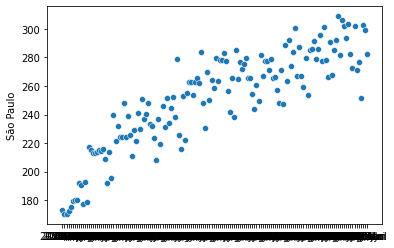

In [307]:
sns.scatterplot(x=ordenados_total.columns, y= ordenados_total.loc['São Paulo']) #y tem que ser uma coluna

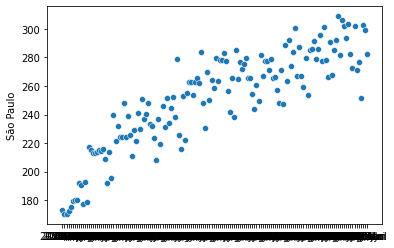

In [313]:
#uso tradicional do scatterplot
#sns.scatterplot(data=dados, x=colunaX, y=colunaY)

#como os estados de interesse estão como indices, passamos eles para coluna
mensal = ordenados_total.T

sns.scatterplot(data=mensal, x=mensal.index, y="São Paulo")

### Desafio 3.1: Plotar com o seu estado (ou com outro de interesse)

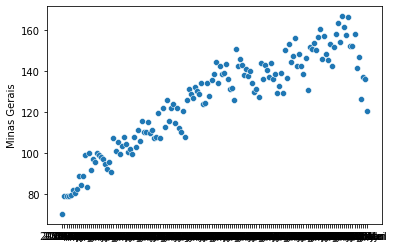

In [314]:
sns.scatterplot(data=mensal, x=mensal.index, y="Minas Gerais")

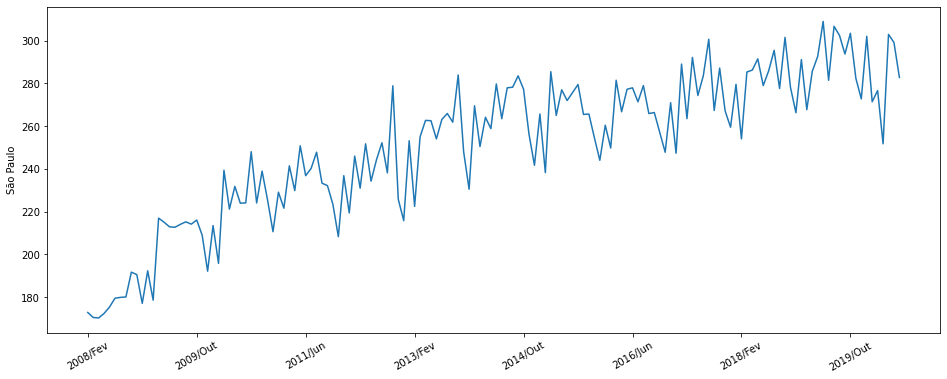

In [324]:
#uso de linhas para visualização de time series
plt.figure(figsize=(16,6))

#ao plotar algo, o que nos é retornado são os eixos, então podemos salvar esse retorno
  #em uma variável ax
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")

#evitar que nomes do x fiquem na horizontal para melhorar a visualização
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.AutoLocator()) #onde vou localizar o tick - melhor localização
# Há vários locators diferentes (documentation on tick-locators)
plt.show()

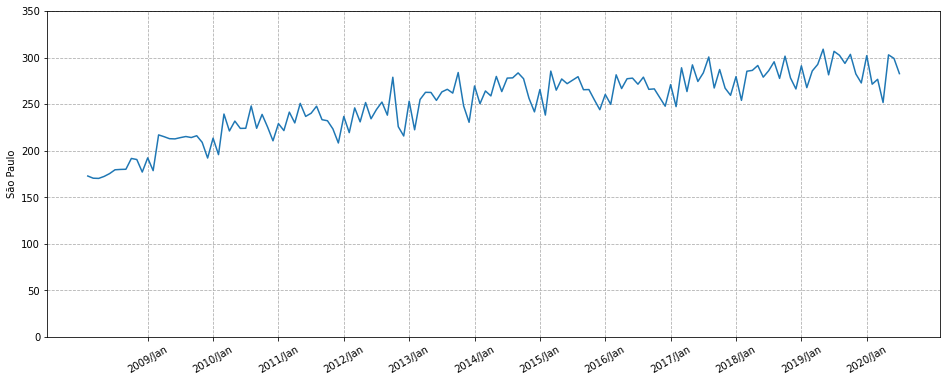

In [331]:
#alterando os ticks para melhor identificação, em "Anos"
plt.figure(figsize=(16,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0,350)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11)) # a cada Janeiro
plt.grid(True, linestyle="--")
plt.show()

### Desafio 3.2: Formatar o eixo Y, colocando a escala em milhões usando o StrMethodFormatter, colocar um título no gráfico e os títulos do nos 2 eixos. Alterar fonte (tamanho) dos títulos

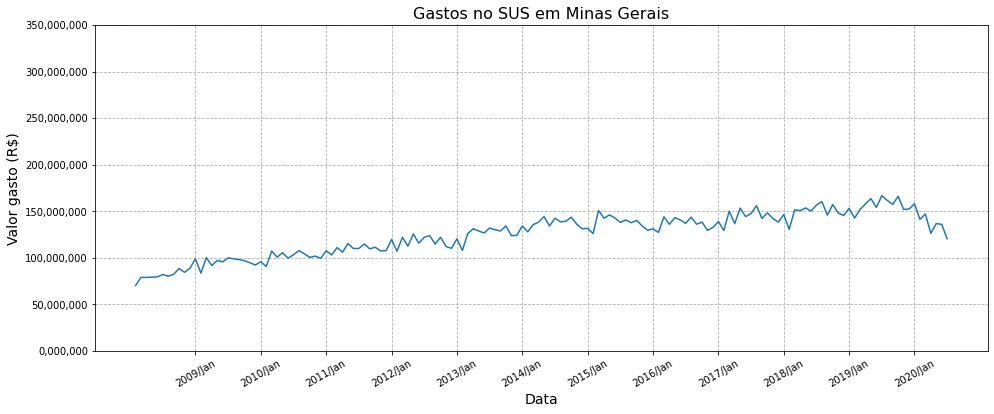

In [353]:
estado_plot = "Minas Gerais"

plt.figure(figsize=(16,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y=estado_plot)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11)) # a cada Janeiro

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,g},000,000'))
plt.title('Gastos no SUS em {}'.format(estado_plot), fontdict={'fontsize':16})
plt.xlabel('Data', fontdict={'fontsize':14})
plt.ylabel('Valor gasto (R$)', fontdict={'fontsize':14})

plt.xticks(rotation=30)
plt.ylim(0,350)
plt.grid(True, linestyle="--")
plt.show()

## Aula 4

### Datas com Datetime

As datas usadas nesses dados não estão formatadas como strings, não datas, então isso atrapalha ao buscar datas ou períodos específicos

In [358]:
from datetime import date
date.today()

datetime.date(2021, 6, 3)

In [ ]:
f(x) = y # aplicar a função em x para receber y

In [369]:
meses = {
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr": 4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11, 
    "Dez": 12,
}

def para_dia(ano_mes):
  ano: int = int(ano_mes[:4]) #fazer verificação se o parâmetro é de fato um int
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes] #busca no dict 'meses' o valor atribuido a 'mes'
  
  return date(ano,mes_numero,1)


In [370]:
mensal.index.map(para_dia) # Faz um mapeamento de uma função em cada item do index

Index([2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01, 2008-07-01,
       2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01,
       ...
       2019-10-01, 2019-11-01, 2019-12-01, 2020-01-01, 2020-02-01, 2020-03-01,
       2020-04-01, 2020-05-01, 2020-06-01, 2020-07-01],
      dtype='object', length=150)

In [371]:
mensal.index = mensal.index.map(para_dia) # Faz um mapeamento de uma função em cada item do index
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.834915,70.301090,48.855046,45.897705,44.122593,33.410124,26.222079,24.409573,27.643305,18.149374,20.126081,13.452264,10.032886,9.110109,10.871590,10.215957,8.279289,9.711680,8.112220,7.929895,7.934652,4.636851,5.051932,1.940793,1.743979,0.771688,1.275064
2008-03-01,170.481850,79.119006,55.611791,52.928696,42.892666,41.301703,30.716362,27.483480,30.085370,20.992213,22.149376,14.750895,12.262049,10.126627,12.348758,11.627918,9.793889,10.428191,9.210506,9.416368,8.641517,5.017838,5.200152,1.955722,2.057439,0.876091,1.177746
2008-04-01,170.278286,79.046322,56.115136,51.972417,45.295963,42.826994,30.589333,27.806641,31.376221,21.049477,23.436683,15.148647,12.453467,10.964235,12.680965,11.922015,8.997543,10.227943,10.466692,9.390588,8.531576,5.265951,5.343715,2.143354,2.057830,0.896953,1.396372
2008-05-01,172.402181,79.268070,55.574832,51.679351,43.951349,42.071294,31.409553,28.354280,31.189905,19.162547,23.861081,14.543680,11.789786,11.032871,13.258412,11.900817,9.842109,10.562149,9.844096,9.378197,9.079902,5.367095,5.344488,2.280383,2.226578,1.027289,1.411521
2008-06-01,175.416596,79.608653,56.094755,53.759674,44.102926,39.910042,28.947511,28.993293,29.463965,20.332534,23.502916,14.553978,11.889687,10.450599,12.246686,11.969272,10.257782,10.465089,10.288668,9.450301,8.646296,4.981036,5.398413,2.624543,2.112577,0.938294,1.420892


In [374]:
mensal.info() #agora o index é uma data

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2008-02-01 to 2020-07-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            150 non-null    float64
 1   Minas Gerais         150 non-null    float64
 2   Paraná               150 non-null    float64
 3   Rio Grande do Sul    150 non-null    float64
 4   Rio de Janeiro       150 non-null    float64
 5   Bahia                150 non-null    float64
 6   Pernambuco           150 non-null    float64
 7   Santa Catarina       150 non-null    float64
 8   Ceará                150 non-null    float64
 9   Goiás                150 non-null    float64
 10  Pará                 150 non-null    float64
 11  Maranhão             150 non-null    float64
 12  Espírito Santo       150 non-null    float64
 13  Rio Grande do Norte  150 non-null    float64
 14  Paraíba              150 non-null    float64
 15  Distrito Federal     150 non-

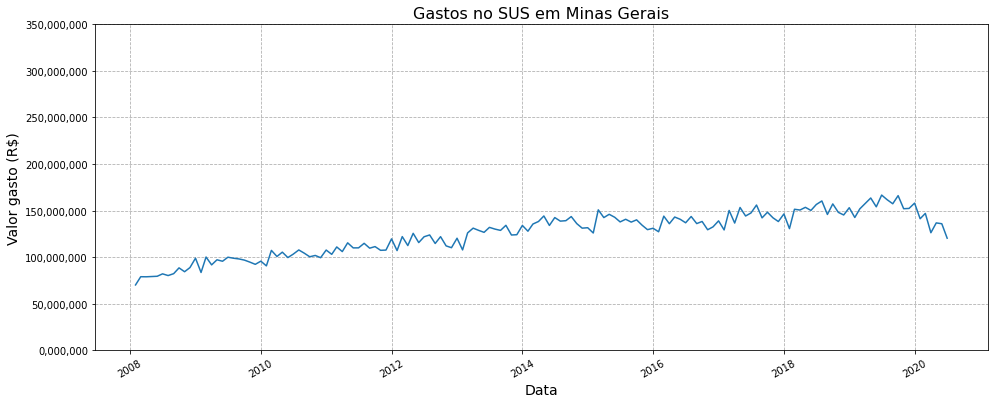

In [373]:
# Então não é mais necessário definir qual o tipo de legenda do eixo x

estado_plot = "Minas Gerais"

plt.figure(figsize=(16,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y=estado_plot)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11)) # a cada Janeiro

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,g},000,000'))
plt.title('Gastos no SUS em {}'.format(estado_plot), fontdict={'fontsize':16})
plt.xlabel('Data', fontdict={'fontsize':14})
plt.ylabel('Valor gasto (R$)', fontdict={'fontsize':14})

plt.xticks(rotation=30)
plt.ylim(0,350)
plt.grid(True, linestyle="--")
plt.show()

### Manipulação de dados com Melt

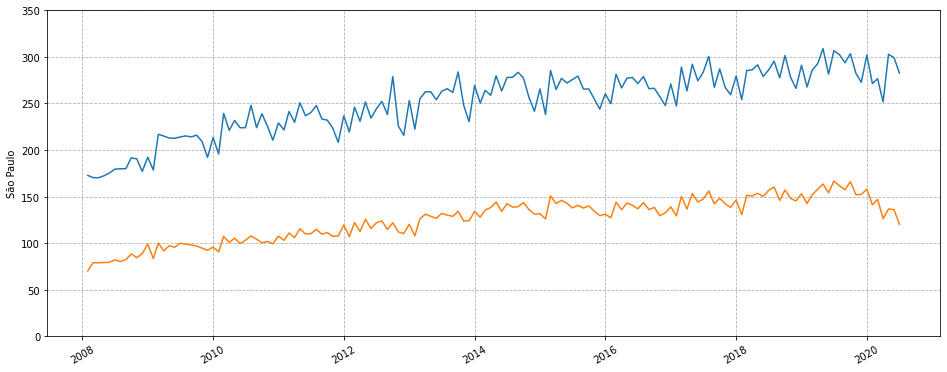

In [375]:
#Para plotar dois estados no mesmo gráfico

plt.figure(figsize=(16,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
ax = sns.lineplot(data=mensal, x=mensal.index, y="Minas Gerais")

plt.xticks(rotation=30)
plt.ylim(0,350)
plt.grid(True, linestyle="--")
plt.show()

#Problemas:
# 1. eixos 
# 2. legenda (qual linha é qual?)
# 3. copy e paste das linhas para cada estado - se forem os 27 estados?

In [376]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.834915,70.301090,48.855046,45.897705,44.122593,33.410124,26.222079,24.409573,27.643305,18.149374,20.126081,13.452264,10.032886,9.110109,10.871590,10.215957,8.279289,9.711680,8.112220,7.929895,7.934652,4.636851,5.051932,1.940793,1.743979,0.771688,1.275064
2008-03-01,170.481850,79.119006,55.611791,52.928696,42.892666,41.301703,30.716362,27.483480,30.085370,20.992213,22.149376,14.750895,12.262049,10.126627,12.348758,11.627918,9.793889,10.428191,9.210506,9.416368,8.641517,5.017838,5.200152,1.955722,2.057439,0.876091,1.177746
2008-04-01,170.278286,79.046322,56.115136,51.972417,45.295963,42.826994,30.589333,27.806641,31.376221,21.049477,23.436683,15.148647,12.453467,10.964235,12.680965,11.922015,8.997543,10.227943,10.466692,9.390588,8.531576,5.265951,5.343715,2.143354,2.057830,0.896953,1.396372
2008-05-01,172.402181,79.268070,55.574832,51.679351,43.951349,42.071294,31.409553,28.354280,31.189905,19.162547,23.861081,14.543680,11.789786,11.032871,13.258412,11.900817,9.842109,10.562149,9.844096,9.378197,9.079902,5.367095,5.344488,2.280383,2.226578,1.027289,1.411521
2008-06-01,175.416596,79.608653,56.094755,53.759674,44.102926,39.910042,28.947511,28.993293,29.463965,20.332534,23.502916,14.553978,11.889687,10.450599,12.246686,11.969272,10.257782,10.465089,10.288668,9.450301,8.646296,4.981036,5.398413,2.624543,2.112577,0.938294,1.420892


Queremos usar uma tabela onde temos uma coluna definindo o estado

```
MES        VALOR        ESTADO
2008-03    170.48       Sao Paulo
2008-03     79.12       Minas Gerais
```



In [377]:
mensal.reset_index()

Unidade da Federação,index,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
0,2008-02-01,172.834915,70.301090,48.855046,45.897705,44.122593,33.410124,26.222079,24.409573,27.643305,18.149374,20.126081,13.452264,10.032886,9.110109,10.871590,10.215957,8.279289,9.711680,8.112220,7.929895,7.934652,4.636851,5.051932,1.940793,1.743979,0.771688,1.275064
1,2008-03-01,170.481850,79.119006,55.611791,52.928696,42.892666,41.301703,30.716362,27.483480,30.085370,20.992213,22.149376,14.750895,12.262049,10.126627,12.348758,11.627918,9.793889,10.428191,9.210506,9.416368,8.641517,5.017838,5.200152,1.955722,2.057439,0.876091,1.177746
2,2008-04-01,170.278286,79.046322,56.115136,51.972417,45.295963,42.826994,30.589333,27.806641,31.376221,21.049477,23.436683,15.148647,12.453467,10.964235,12.680965,11.922015,8.997543,10.227943,10.466692,9.390588,8.531576,5.265951,5.343715,2.143354,2.057830,0.896953,1.396372
3,2008-05-01,172.402181,79.268070,55.574832,51.679351,43.951349,42.071294,31.409553,28.354280,31.189905,19.162547,23.861081,14.543680,11.789786,11.032871,13.258412,11.900817,9.842109,10.562149,9.844096,9.378197,9.079902,5.367095,5.344488,2.280383,2.226578,1.027289,1.411521
4,2008-06-01,175.416596,79.608653,56.094755,53.759674,44.102926,39.910042,28.947511,28.993293,29.463965,20.332534,23.502916,14.553978,11.889687,10.450599,12.246686,11.969272,10.257782,10.465089,10.288668,9.450301,8.646296,4.981036,5.398413,2.624543,2.112577,0.938294,1.420892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020-03-01,276.606289,147.078556,114.476998,84.651397,73.594498,70.340301,59.628674,56.709962,46.395357,34.558309,34.749098,28.832662,26.555689,20.936692,17.607478,19.405447,17.357009,15.318975,15.998722,14.444208,14.773739,9.193249,7.025821,7.174312,2.859102,2.813954,2.286241
146,2020-04-01,251.696363,126.330650,96.727112,76.294597,68.160773,59.109689,53.843729,51.179993,43.468817,27.499308,28.714970,23.938157,23.735725,17.319948,15.386631,18.123900,15.652773,11.878587,14.241361,11.943714,16.330914,8.395907,6.204453,7.423679,2.472063,2.304961,1.774558
147,2020-05-01,302.857661,136.867276,106.103738,86.076113,86.281033,61.756776,65.424719,56.843604,54.200339,31.870108,41.248503,32.979448,28.614684,19.916571,18.970544,21.437430,16.703851,14.175053,15.254204,13.981483,19.441151,8.450210,6.732371,8.581195,2.383895,2.910776,2.701015
148,2020-06-01,299.060852,135.977572,92.901461,89.019479,77.604925,65.159301,68.145111,56.503748,42.146556,34.437633,35.396031,31.128145,27.450865,20.219962,19.666097,23.479773,15.838659,15.375524,14.278872,14.585009,17.509335,6.705923,5.018138,9.193594,2.199921,3.216467,2.699492


In [381]:
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['Mes', "UF", "Valor"]
mensal_aberto.head()

,Mes,UF,Valor
0,2008-02-01,São Paulo,172.834915
1,2008-03-01,São Paulo,170.481850
2,2008-04-01,São Paulo,170.278286
3,2008-05-01,São Paulo,172.402181
4,2008-06-01,São Paulo,175.416596


### Desafio 4.1: Voltar atrás... partindo do `mensal_aberto` chegar no `mensal` (pivot-table)

In [388]:
mensal_aberto.pivot_table(values='Valor', index='UF', columns='Mes', aggfunc='sum')

Mes,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,2008-12-01,2009-01-01,2009-02-01,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01,2010-01-01,2010-02-01,2010-03-01,2010-04-01,2010-05-01,2010-06-01,2010-07-01,2010-08-01,2010-09-01,2010-10-01,2010-11-01,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,...,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01
UF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acre,1.743979,2.057439,2.057830,2.226578,2.112577,2.029128,1.886872,2.084885,2.230838,2.122013,2.196652,2.152239,2.086776,2.476364,2.396888,2.610262,2.174098,2.051885,1.714708,1.341532,2.288459,2.462713,2.254900,2.381536,2.079981,2.564838,2.588318,2.538526,2.319786,2.279157,2.454599,2.578924,2.625443,2.512995,2.500590,2.749522,2.473516,2.801446,2.672803,3.135521,...,2.811365,3.161447,3.355223,3.562692,3.375297,3.341498,3.358378,3.145385,2.638774,2.968169,2.769797,3.057632,2.874965,3.175575,3.060903,3.253012,3.040645,2.926179,3.126121,2.473455,2.277493,2.594347,2.234388,2.473008,2.979765,3.070534,3.249053,3.567539,2.981073,2.998860,3.293379,3.174249,2.959569,3.261124,2.981264,2.859102,2.472063,2.383895,2.199921,1.163813
Alagoas,8.112220,9.210506,10.466692,9.844096,10.288668,9.385440,9.262768,9.228202,9.464598,9.578540,9.361248,10.121881,8.994586,12.040997,11.651219,11.471079,10.955770,11.345518,11.715157,11.732051,12.050094,11.895952,11.016104,11.200586,10.243569,13.197957,12.543381,13.186678,11.564477,11.698449,12.689694,12.333599,12.248867,12.103493,10.972429,11.056589,11.826445,13.178547,12.260250,13.929546,...,15.260074,16.734817,15.508170,16.475135,16.993184,16.039891,16.428153,16.460531,15.069230,16.407624,14.108284,17.291775,18.077005,18.191827,16.601616,18.017803,18.221250,16.273547,18.384715,16.186512,14.723253,18.036476,16.432944,16.383367,16.967319,18.401781,16.665271,18.010280,17.668106,17.493927,18.373191,16.429690,15.969025,17.263961,15.228726,15.998722,14.241361,15.254204,14.278872,13.087850
Amapá,1.275064,1.177746,1.396372,1.411521,1.420892,1.367235,1.550341,1.550167,1.635676,1.647903,1.649381,1.702307,1.617604,1.863376,1.899215,1.929012,1.776156,1.765732,2.038763,1.820034,1.806092,1.669319,1.551083,1.713037,1.448489,1.850181,1.860225,1.739371,1.826492,1.827433,1.933783,1.721224,1.679410,1.672234,1.514788,1.865893,1.684178,1.916700,1.961976,1.868836,...,1.813478,2.125677,2.128578,1.873121,1.990850,1.920808,1.915177,1.782927,1.610779,1.888217,1.756846,1.869746,2.009211,2.092229,2.047927,2.260211,2.408659,2.369224,2.588154,2.298458,2.356799,2.441325,2.564176,2.604264,2.573616,2.127852,2.632891,2.445875,2.173061,2.541342,2.540184,2.239443,2.141401,2.349859,2.342500,2.286241,1.774558,2.701015,2.699492,2.155083
Amazonas,7.934652,8.641517,8.531576,9.079902,8.646296,8.755807,8.331764,8.148090,7.681661,7.761445,7.764783,8.607223,8.385963,9.207129,8.160517,8.562322,9.484999,9.465069,9.267007,9.092824,9.218407,8.674068,8.365788,9.386945,8.373049,10.321150,9.990164,9.767161,9.151839,9.140197,9.437224,9.742680,9.996686,9.532878,9.335803,9.800512,9.461665,10.954546,10.529645,10.105494,...,13.717832,13.909566,13.718828,14.396211,13.745304,13.979793,13.895516,13.518117,13.635186,14.549451,12.753555,14.749409,14.577931,15.381062,14.653651,15.544596,16.374961,15.343341,16.249964,14.255409,14.274054,15.358914,14.100075,16.103972,16.154492,16.529976,15.509985,16.642221,16.493720,15.346323,16.282437,14.781332,14.923380,15.939561,15.138111,14.773739,16.330914,19.441151,17.509335,

-----

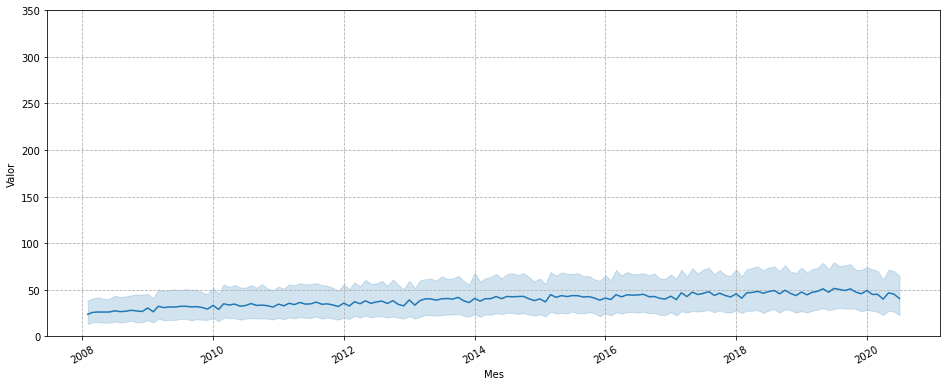

In [382]:
plt.figure(figsize=(16,6))

ax = sns.lineplot(data=mensal_aberto, x="Mes", y="Valor") #plot 'simples', ...
#...    agruipando vários y no mesmo x, mostrando média e intervalo de confiança

plt.xticks(rotation=30)
plt.ylim(0,350)
plt.grid(True, linestyle="--")
plt.show()

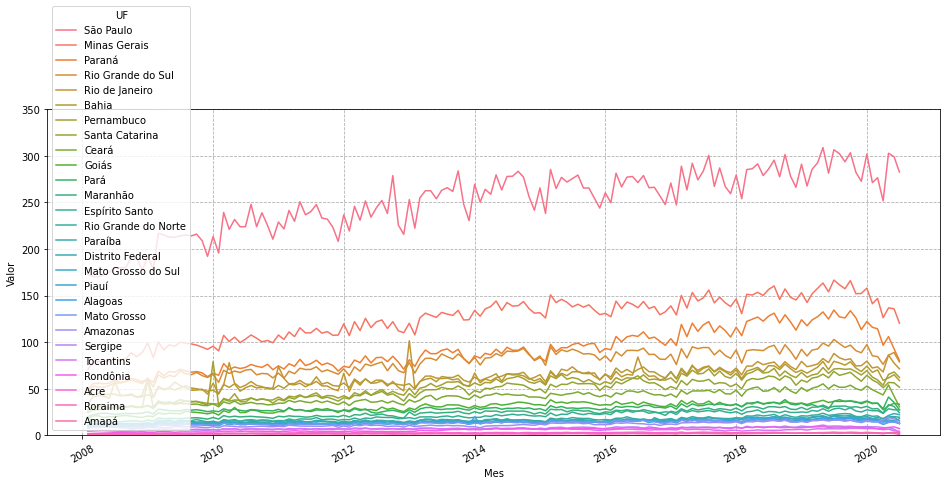

In [383]:
plt.figure(figsize=(16,6))

ax = sns.lineplot(data=mensal_aberto, x="Mes", y="Valor", hue = "UF") 

plt.xticks(rotation=30)
plt.ylim(0,350)
plt.grid(True, linestyle="--")
plt.show()

### Desafio 4.2: Melhorar o gráfico
- Muitos estados, escolha quais estados plotar
 -  Use estados que façam sentido comparar
- Mudar palette de cores (27 cores?)
- Posição da legenda
- Título geral e título dos eixos

In [390]:
mensal_aberto.head()

,Mes,UF,Valor
0,2008-02-01,São Paulo,172.834915
1,2008-03-01,São Paulo,170.481850
2,2008-04-01,São Paulo,170.278286
3,2008-05-01,São Paulo,172.402181
4,2008-06-01,São Paulo,175.416596


In [405]:
#Definir Regiões para cada Estado
estados = dados_raw[['Unidade da Federação','Total']]
display(estados.head())


,Unidade da Federação,Total
0,11 Rondônia,9.291297e+08
1,12 Acre,4.206680e+08
2,13 Amazonas,1.771655e+09
3,14 Roraima,3.050109e+08
4,15 Pará,4.437116e+09


In [408]:
estados['UF'] = estados['Unidade da Federação'].str[3:]
estados['cod_UF'] = estados['Unidade da Federação'].str[:2]
estados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unidade da Federação,Total,UF,cod_UF
0,11 Rondônia,9.291297e+08,Rondônia,11
1,12 Acre,4.206680e+08,Acre,12
2,13 Amazonas,1.771655e+09,Amazonas,13
3,14 Roraima,3.050109e+08,Roraima,14
4,15 Pará,4.437116e+09,Pará,15


In [413]:
nome_regiao = {
    '1':'Norte',
    '2':'Nordeste',
    '3':'Sudeste',
    '4':'Sul',
    '5':'Centro-Oeste'
}

#estados['Regiao'] = 
def set_region(cod_UF):
  regiao = nome_regiao[cod_UF[:1]]
  return regiao

estados['Regiao'] = estados['cod_UF'].map(set_region)
estados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unidade da Federação,Total,UF,cod_UF,Regiao
0,11 Rondônia,9.291297e+08,Rondônia,11,Norte
1,12 Acre,4.206680e+08,Acre,12,Norte
2,13 Amazonas,1.771655e+09,Amazonas,13,Norte
3,14 Roraima,3.050109e+08,Roraima,14,Norte
4,15 Pará,4.437116e+09,Pará,15,Norte


In [414]:
estados = estados.drop(['Unidade da Federação','Total'], axis=1).set_index('UF')
estados.head()

,cod_UF,Regiao
UF,,
Rondônia,11,Norte
Acre,12,Norte
Amazonas,13,Norte
Roraima,14,Norte
Pará,15,Norte


In [427]:
mensal_pivot = mensal_aberto.pivot_table(values='Valor', index='UF', columns='Mes', 
                          aggfunc='sum')
mensal_aberto_new = mensal_pivot.join(estados).reset_index().melt(id_vars=['Regiao','cod_UF','UF'])
mensal_aberto_new.columns = ['Regiao', 'cod_UF', 'UF', 'Data', "Valor"]
mensal_aberto_new.head()

,Regiao,cod_UF,UF,Data,Valor
0,Norte,12,Acre,2008-02-01,1.743979
1,Nordeste,27,Alagoas,2008-02-01,8.112220
2,Norte,16,Amapá,2008-02-01,1.275064
3,Norte,13,Amazonas,2008-02-01,7.934652
4,Nordeste,29,Bahia,2008-02-01,33.410124


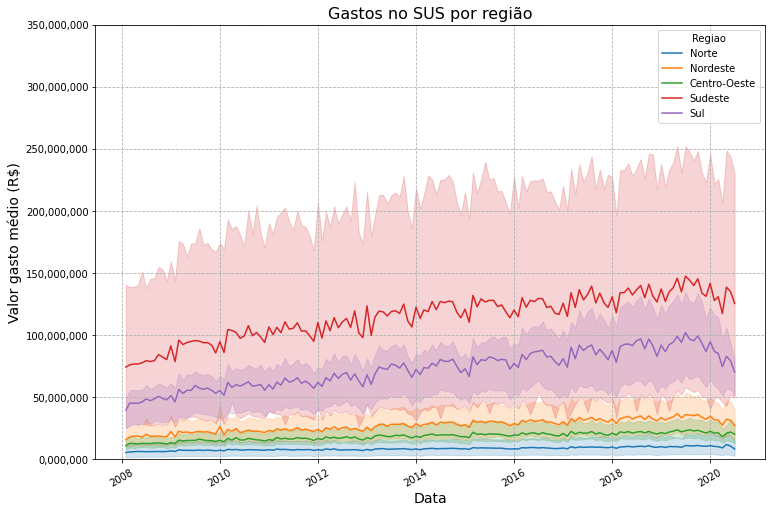

In [431]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mensal_aberto_new, x='Data',y='Valor',hue = 'Regiao')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,g},000,000'))
plt.title('Gastos no SUS por região', fontdict={'fontsize':16})
plt.xlabel('Data', fontdict={'fontsize':14})
plt.ylabel('Valor gasto médio (R$)', fontdict={'fontsize':14})

plt.xticks(rotation=30)
plt.ylim(0,350)
plt.grid(True, linestyle="--")
plt.show()

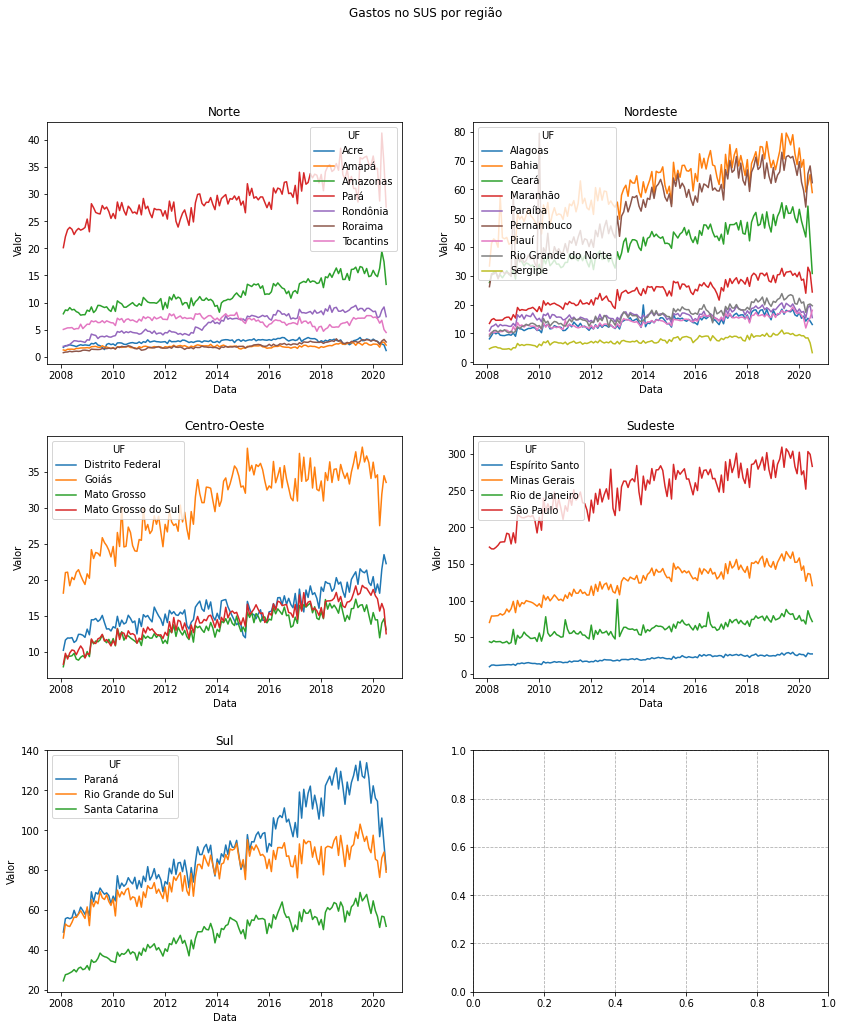

In [530]:
#definindo o plot para estados de uma região específica

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(14,16))
fig.suptitle('Gastos no SUS por região', fontdict={'fontsize':16})
#plt.tight_layout(pad=5, h_pad=4, w_pad=None, rect=None)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

plt.grid(True, linestyle="--")

counter = 0
for a in enumerate(axes):
  for b in enumerate(a):
    if counter == 5: break
    uf = mensal_aberto_new['Regiao'].unique()[counter]
    regiao_plot = mensal_aberto_new[mensal_aberto_new['Regiao'] == uf]
    
    sns.lineplot(ax=axes[a[0],b[0]], data=regiao_plot, x='Data', y='Valor',hue='UF')
    axes[a[0],b[0]].set_title(uf)
    plt.ylim(bottom=0)

    counter = counter+1
    #plt.show()


É possível verificar cada região e comparar seus estados,porém não é possível comparar regiões entre si do jeito que está.

Para evitar que se tire conclusões precipitadas sobre o gráfico acima, colocamos os valores na mesma escala para comparação definindo o plot para estados de uma região específica

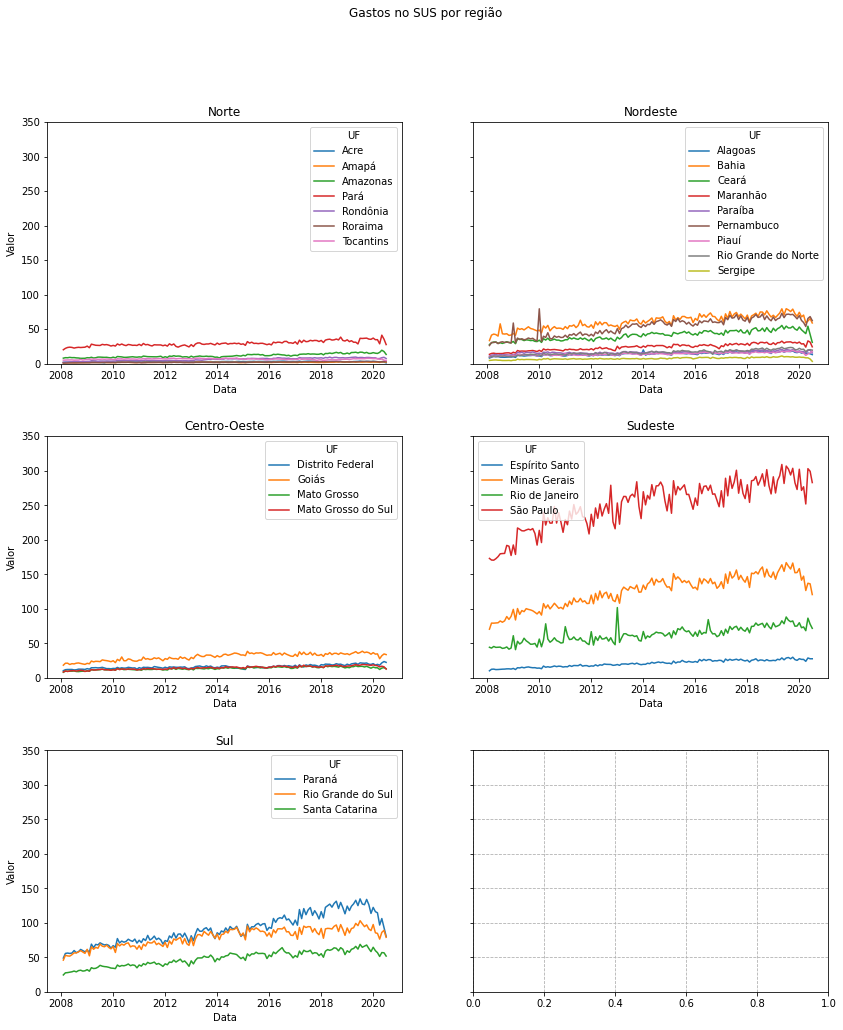

In [533]:


fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(14,16), sharey=True)
fig.suptitle('Gastos no SUS por região', fontdict={'fontsize':16})
#plt.tight_layout(pad=5, h_pad=4, w_pad=None, rect=None)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

plt.grid(True, linestyle="--")  
plt.ylim(0,350)

counter = 0
for a in enumerate(axes):
  for b in enumerate(a):
    if counter == 5: break
    uf = mensal_aberto_new['Regiao'].unique()[counter]
    regiao_plot = mensal_aberto_new[mensal_aberto_new['Regiao'] == uf]
    
    sns.lineplot(ax=axes[a[0],b[0]], data=regiao_plot, x='Data', y='Valor',hue='UF')
    axes[a[0],b[0]].set_title(uf)


    counter = counter+1
    #plt.show()




## Aula 5

### a